# Bank Marketing Data Set

Attribute Information
Input variables:
- **1 - age**(numeric)
- **2 - job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self- employed','services','student','technician','unemployed','unknown')
- **3 - marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- **4 - education** :  (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- **5 - default** : has credit in default? (categorical: 'no','yes','unknown')
- **6 - housing** : has housing loan? (categorical: 'no','yes','unknown')
- **7 - loan** : has personal loan? (categorical: 'no','yes','unknown')
## Related with the last contact of the current campaign:
- **8 - contact** : contact communication type (categorical: 'cellular','telephone')
- **9 - month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **10 - day_of_week** : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- **11 - duration** : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included
for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. # other attributes:
- **12 - campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **13 - pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **14 - previous** : number of contacts performed before this campaign and for this client (numeric)
- **15 - poutcome** : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## Social and economic context attributes
- **16 - emp.var.rate** : employment variation rate - quarterly indicator (numeric) 
- **17 - cons.price.idx** : consumer price index - monthly indicator (numeric)
- **18 - cons.conf.idx** : consumer confidence index - monthly indicator (numeric)
- **19 - euribor3m** : euribor 3 month rate - daily indicator (numeric)
- **20 - nr.employed** : number of employees - quarterly indicator (numeric)

- **21- ModelPerformance** – Results from a current model used to predict whether a client will subscribe (‘yes’) to a term deposit (probability of subscribing to term deposit)
Output Variable (desired target):
- **22 - y**  - has the client subscribed a term deposit? (binary: 'yes','no')

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import pandas.plotting

%matplotlib inline


### Read in Data

In [2]:
dt = pd.read_csv('DSA_Data_Set.csv')
dt.head(500)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31,services,married,high.school,unknown,unknown,unknown,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.961254,no
496,38,technician,married,professional.course,no,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.935241,no
497,35,admin.,divorced,university.degree,unknown,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945088,no
498,53,admin.,married,professional.course,no,yes,no,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.931315,no


In [3]:
dt.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [5]:
# Check for missing data
dt.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

### HISTOGRAM Numeric Variables

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

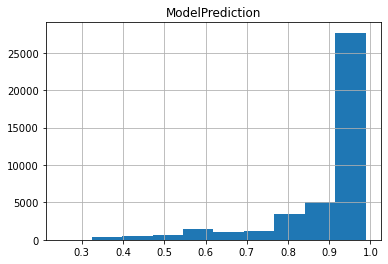

In [6]:
dt.hist('ModelPrediction')

array([[<AxesSubplot:title={'center':'euribor3m'}>]], dtype=object)

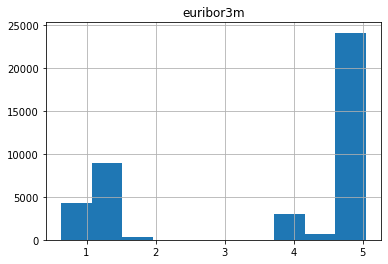

In [7]:
dt.hist('euribor3m')

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

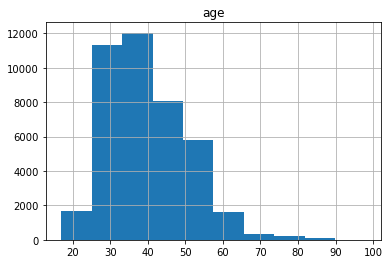

In [8]:
dt.hist('age')

array([[<AxesSubplot:title={'center':'duration'}>]], dtype=object)

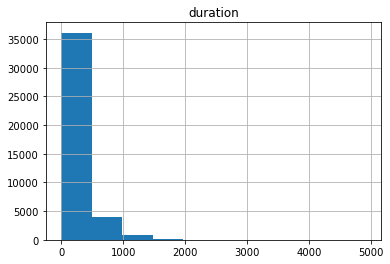

In [9]:
dt.hist('duration')

array([[<AxesSubplot:title={'center':'campaign'}>]], dtype=object)

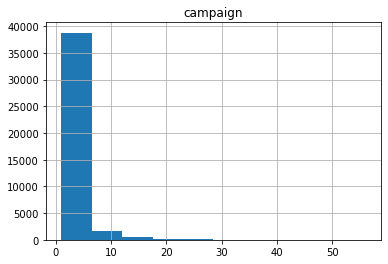

In [10]:
dt.hist('campaign')

array([[<AxesSubplot:title={'center':'pdays'}>]], dtype=object)

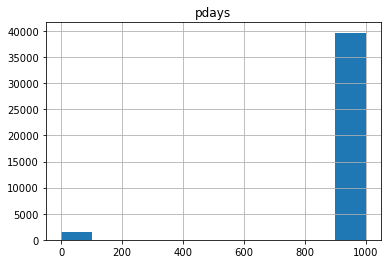

In [11]:
dt.hist('pdays')
## number of days that passed by after the client was last contacted from a previous campaign
## 999 means client was not previously contacted

array([[<AxesSubplot:title={'center':'previous'}>]], dtype=object)

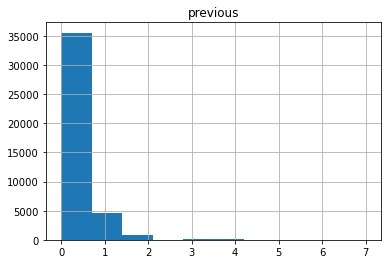

In [12]:
dt.hist('previous')
## number of contacts performed before this campaign and for this client

array([[<AxesSubplot:title={'center':'emp.var.rate'}>]], dtype=object)

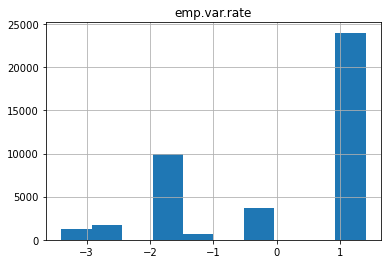

In [13]:
dt.hist('emp.var.rate')

array([[<AxesSubplot:title={'center':'cons.price.idx'}>]], dtype=object)

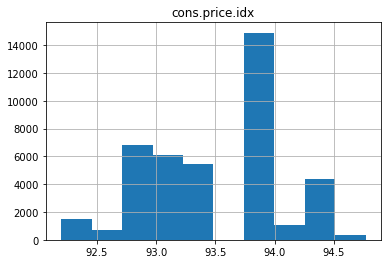

In [14]:
dt.hist('cons.price.idx')

array([[<AxesSubplot:title={'center':'cons.conf.idx'}>]], dtype=object)

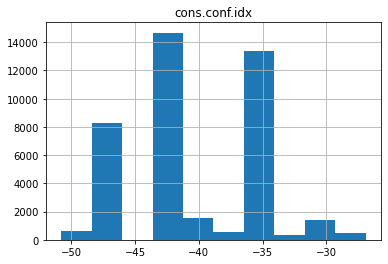

In [15]:
dt.hist('cons.conf.idx')

array([[<AxesSubplot:title={'center':'nr.employed'}>]], dtype=object)

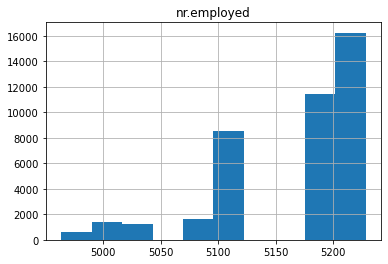

In [16]:
dt.hist('nr.employed')

## Dictionary to convert 'y' to binary 0 and 1

In [18]:
y_num = {'no': 0, 'yes': 1}
dt['y']= dt['y'].map(y_num)
dt.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0


### Group by each categorical variable and count the number of positive outcomes

<AxesSubplot:xlabel='job'>

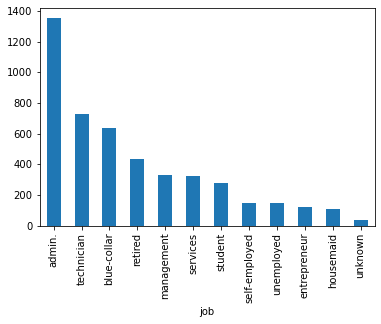

In [19]:
## Group by 'job' and count the number of positive outcomes (sum y = 1).
data = dt.groupby('job').y.sum().sort_values(ascending = False)
data.plot.bar()

## Job is an important feature

<AxesSubplot:xlabel='marital'>

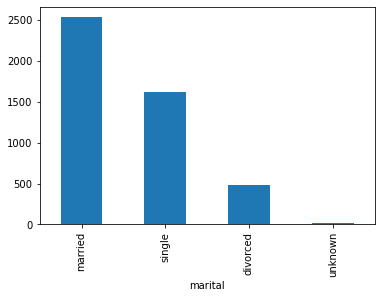

In [20]:
## Group by 'marital' and count the number of positive outcomes (sum y = 1).
data = dt.groupby('marital').y.sum().sort_values(ascending = False)
data.plot.bar()

## Marital Status is an important feature

<AxesSubplot:xlabel='education'>

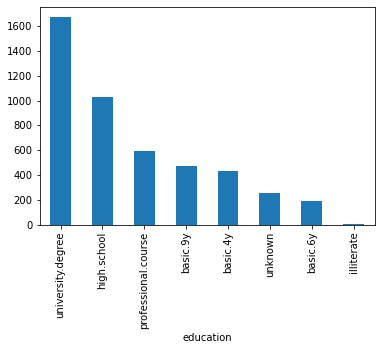

In [21]:
## Group by 'education' and count the number of positive outcomes (sum y = 1).
data = dt.groupby('education').y.sum().sort_values(ascending = False)
data.plot.bar()

## Education is an important feature

<AxesSubplot:xlabel='default'>

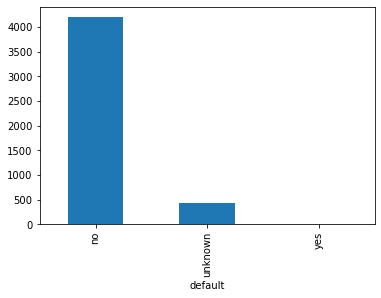

In [22]:
## Group by 'default' and count the number of positive outcomes (sum y = 1).
data = dt.groupby('default').y.sum()
data.plot.bar()

## Credit Default is an important feature

<AxesSubplot:xlabel='housing'>

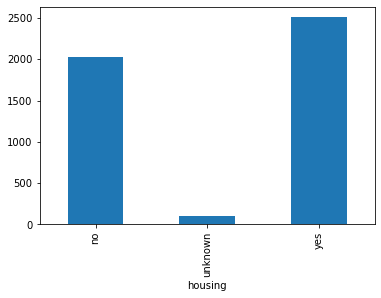

In [23]:
data = dt.groupby('housing').y.sum()
data.plot.bar()

## Housing Loan Status is NOT an important feature

<AxesSubplot:xlabel='loan'>

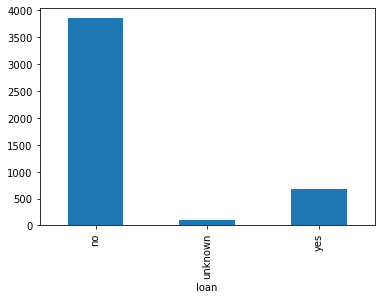

In [24]:
data = dt.groupby('loan').y.sum()
data.plot.bar()

## Loan Status is an important feature

<AxesSubplot:xlabel='contact'>

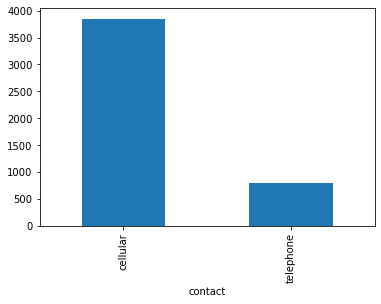

In [25]:
data = dt.groupby('contact').y.sum()
data.plot.bar()

## Contact Type is an important feature

<AxesSubplot:xlabel='month'>

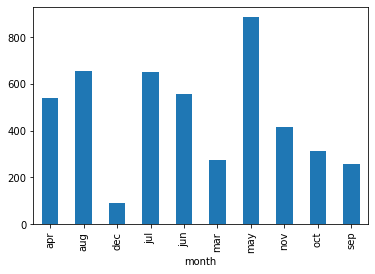

In [26]:
data = dt.groupby('month').y.sum()
data.plot.bar()

([<matplotlib.axis.XTick at 0x7fc5d0413590>,
 [Text(0, 0, 'mar'),
  Text(1, 0, 'apr'),
  Text(2, 0, 'may'),
  Text(3, 0, 'jun'),
  Text(4, 0, 'jul'),
  Text(5, 0, 'aug'),
  Text(6, 0, 'sep'),
  Text(7, 0, 'oct'),
  Text(8, 0, 'nov'),
  Text(9, 0, 'dec')])

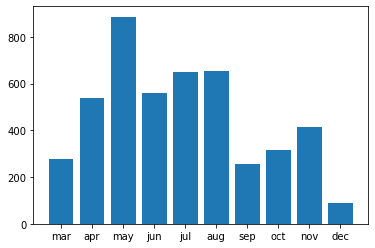

In [27]:
months_indx=['mar','apr','may','jun','jul','aug','sep','oct', 'nov', 'dec']
y_pos = np.arange(len(months_indx))

temp = dt.groupby('month').y.sum()

for i in range(len(months_indx)):
    data[i] = temp[months_indx[i]]

# # Create bars
plt.bar(y_pos, data)

# # Create names on the x-axis in the order
plt.xticks(y_pos, months_indx)


## Last Contact Month is NOT an important feature


In [28]:
### NO data for the month of Jan and Feb... Perhaps related to Euriborn3m 3 months avg (??) 

dt[(dt.month=='jan')].count()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

([<matplotlib.axis.XTick at 0x7fc5d0697d90>,
 [Text(0, 0, 'mon'),
  Text(1, 0, 'tue'),
  Text(2, 0, 'wed'),
  Text(3, 0, 'thu'),
  Text(4, 0, 'fri')])

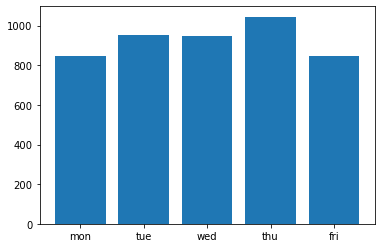

In [29]:
days_indx=['mon','tue','wed','thu','fri']
y_pos = np.arange(len(days_indx))
data = np.zeros(len(days_indx))

temp = dt.groupby('day_of_week').y.sum()

for i in range(len(days_indx)):
    data[i] = temp[days_indx[i]]
    
## Create bars
plt.bar(y_pos,data)

## Create names on the x-axis in the order
plt.xticks(y_pos, days_indx)



## Last Contact day is NOT an important feature


<AxesSubplot:xlabel='poutcome'>

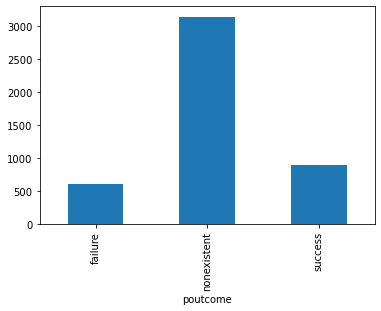

In [30]:
data = dt.groupby('poutcome').y.sum()
data.plot.bar()

<AxesSubplot:xlabel='y', ylabel='ModelPrediction'>

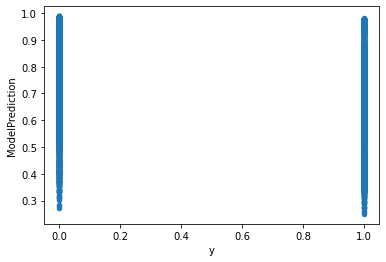

In [31]:
dt.plot.scatter('y','ModelPrediction')

## Clean the Data

In [32]:
dt.shape

(41188, 22)

In [33]:
#### Find 0 duration cases and count the occurances


In [34]:
dt[dt['duration']==0].index

Int64Index([6251, 23031, 28063, 33015], dtype='int64')

In [35]:
len(dt[dt['duration']==0].index)

4

In [36]:
## Clean up 0 duration cases from future processing
dt.drop(dt[dt['duration']==0].index, inplace = True)

In [37]:
dt.shape

(41184, 22)

In [38]:
## Drop irrelevant columns

dt.drop(columns=['day_of_week','month','housing'], inplace=True)
dt.head()

,age,job,marital,education,default,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,0
1,57,services,married,high.school,unknown,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,0
2,37,services,married,high.school,no,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,0
3,40,admin.,married,basic.6y,no,no,telephone,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,0
4,56,services,married,high.school,no,yes,telephone,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,0


In [39]:
## Clean up unknown cases from future processing
dt.drop(dt[(dt['job']=='unknown') | (dt['marital']=='unknown') | (dt['default']=='unknown') | 
           (dt['loan']=='unknown') ].index, inplace = True)


In [40]:
dt.shape 

(31586, 19)

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31586 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              31586 non-null  int64  
 1   job              31586 non-null  object 
 2   marital          31586 non-null  object 
 3   education        31586 non-null  object 
 4   default          31586 non-null  object 
 5   loan             31586 non-null  object 
 6   contact          31586 non-null  object 
 7   duration         31586 non-null  int64  
 8   campaign         31586 non-null  int64  
 9   pdays            31586 non-null  int64  
 10  previous         31586 non-null  int64  
 11  poutcome         31586 non-null  object 
 12  emp.var.rate     31586 non-null  float64
 13  cons.price.idx   31586 non-null  float64
 14  cons.conf.idx    31586 non-null  float64
 15  euribor3m        31586 non-null  float64
 16  nr.employed      31586 non-null  float64
 17  ModelPredict

### Previous and current campaign outcome  

In [42]:
len(dt[(dt.poutcome == 'success') & (dt.y == 1) ].index)

838

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

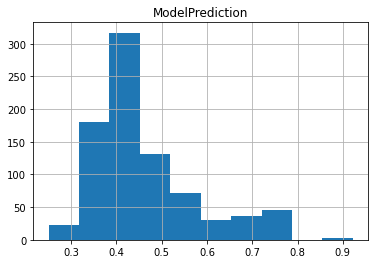

In [43]:
dt[(dt.poutcome == 'success') & (dt.y == 1) ].hist('ModelPrediction')

In [44]:
len(dt[(dt.poutcome == 'failure') & (dt.y == 1) ].index)

544

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

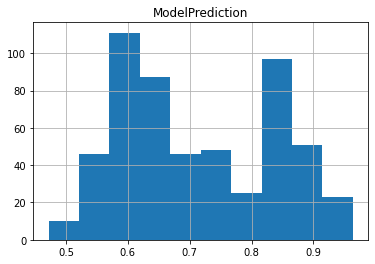

In [45]:
dt[(dt.poutcome == 'failure') & (dt.y == 1) ].hist('ModelPrediction')

In [46]:
len(dt[(dt.poutcome == 'success') & (dt.y == 0) ].index)

427

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

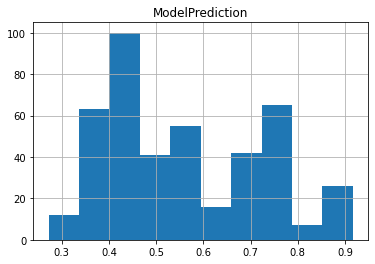

In [47]:
dt[(dt.poutcome == 'success') & (dt.y == 0) ].hist('ModelPrediction')

In [48]:
len(dt[(dt.poutcome == 'failure') & (dt.y == 0) ].index)

3067

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

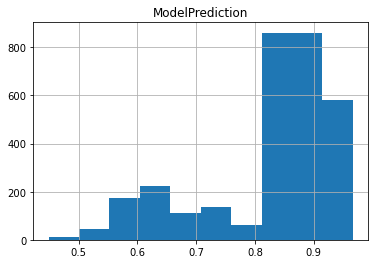

In [49]:
dt[(dt.poutcome == 'failure') & (dt.y == 0) ].hist('ModelPrediction')

In [50]:
len(dt[(dt.poutcome == 'nonexistent') & (dt.y == 1) ].index)

2680

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

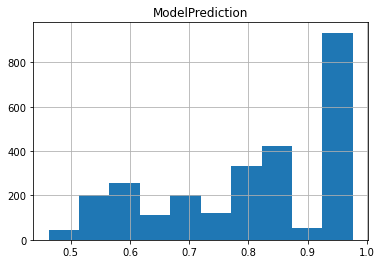

In [51]:
dt[(dt.poutcome == 'nonexistent') & (dt.y == 1) ].hist('ModelPrediction')

In [52]:
len(dt[(dt.poutcome == 'nonexistent') & (dt.y == 0) ].index)

24030

array([[<AxesSubplot:title={'center':'ModelPrediction'}>]], dtype=object)

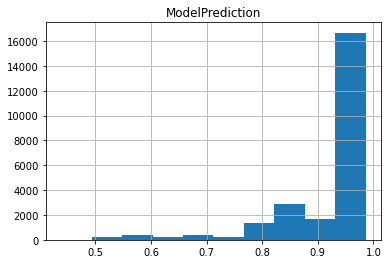

In [53]:
dt[(dt.poutcome == 'nonexistent') & (dt.y == 0) ].hist('ModelPrediction')

## For Nonexistant previous outcome cases Model predicts very high probability, which will significantly affect the accuracy. Model did not generarlize well for new clients.


### Look at Correlations

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='age'>,
        <AxesSubplot:xlabel='ModelPrediction', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>,
        <AxesSubplot

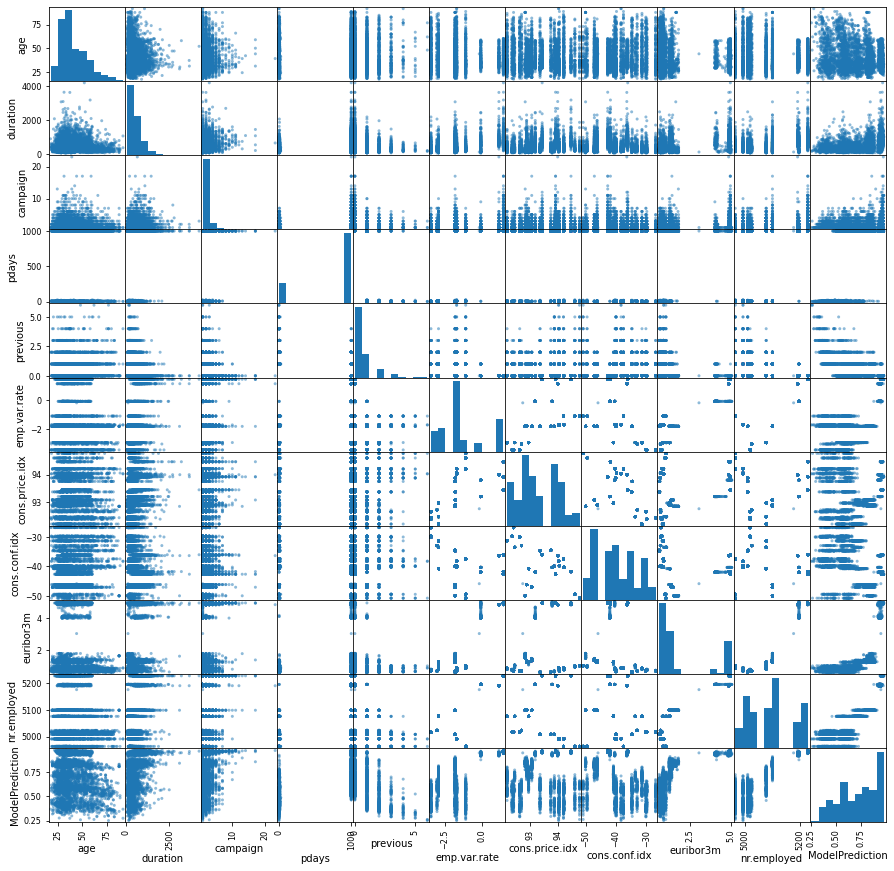

In [54]:
## Clients that subscribed:   y = 1
data = dt.loc[dt.y == 1, ['age', 'duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','ModelPrediction']]

pandas.plotting.scatter_matrix(data, figsize=(15,15))

<AxesSubplot:xlabel='emp.var.rate', ylabel='cons.conf.idx'>

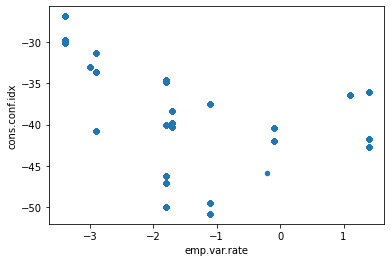

In [55]:
data.plot.scatter('emp.var.rate', 'cons.conf.idx')

<AxesSubplot:xlabel='cons.price.idx', ylabel='cons.conf.idx'>

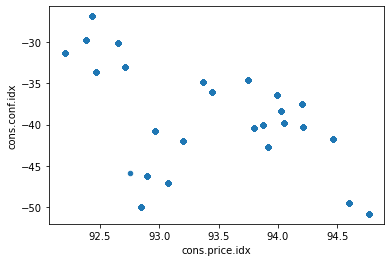

In [56]:
data.plot.scatter( 'cons.price.idx','cons.conf.idx')

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='pdays', ylabel='age'>,
        <AxesSubplot:xlabel='previous', ylabel='age'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='age'>,
        <AxesSubplot:xlabel='ModelPrediction', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='pdays', ylabel='duration'>,
        <AxesSubplot:xlabel='previous', ylabel='duration'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>,
        <AxesSubplot

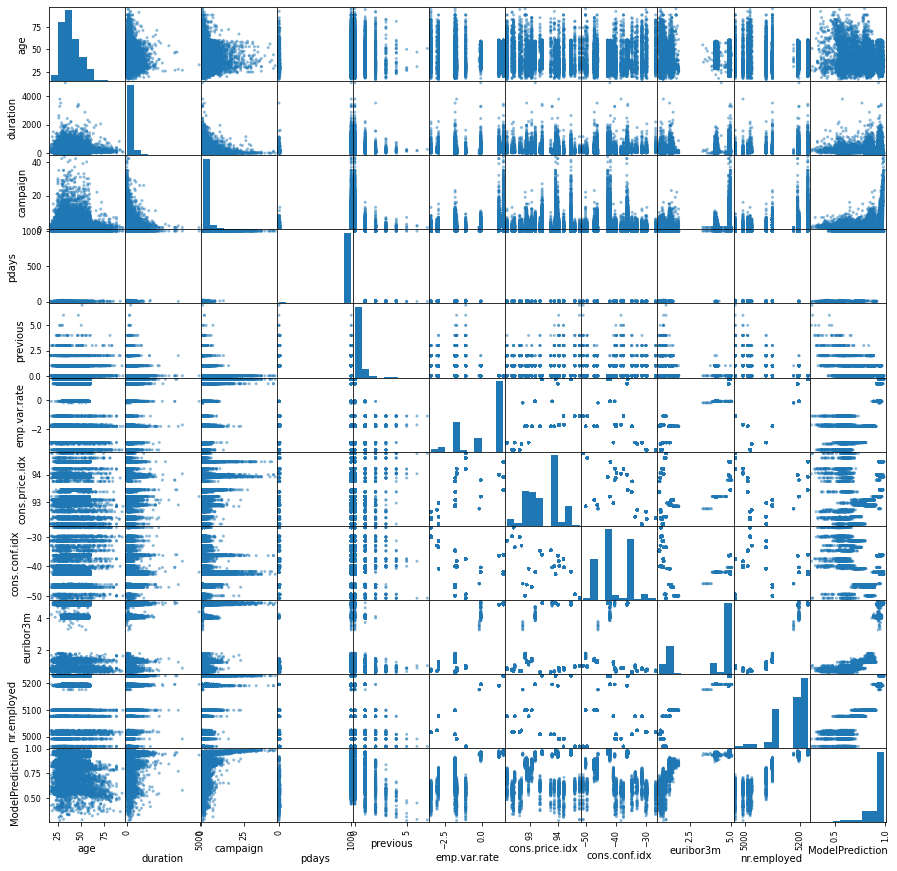

In [57]:
## Clients that did NOT subscribe:   y = 0
data = dt.loc[dt.y ==  0, ['age','duration', 'campaign', 'pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','ModelPrediction']]

pandas.plotting.scatter_matrix(data, figsize=(15,15))

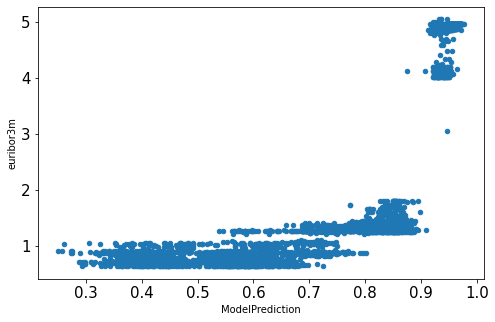

In [58]:
fig = dt.loc[dt.y==1].plot.scatter('ModelPrediction','euribor3m',figsize=(8, 5), fontsize=15).get_figure()
fig.savefig('euribor3m_vs_model.png',dpi=300)


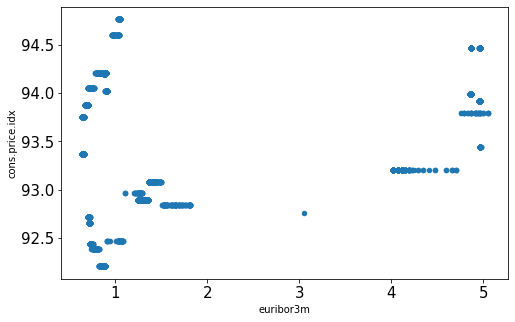

In [59]:
fig=dt.loc[dt.y==1].plot.scatter('euribor3m','cons.price.idx',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('cons.price.idx_vs_euribor3m.png',dpi=300)

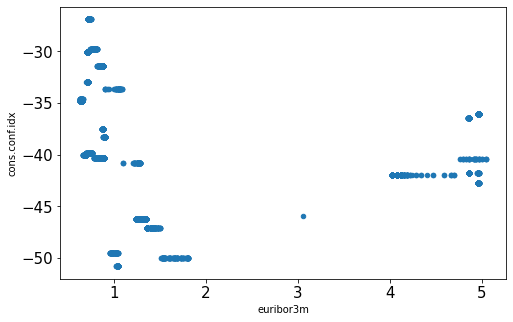

In [60]:
fig=dt.loc[dt.y==1].plot.scatter('euribor3m','cons.conf.idx',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('cons.conf.idx_vs_euribor3m.png',dpi=300)

This scatter plot shows that the model preditions is mostly base on **'euribor3m'** attribute.

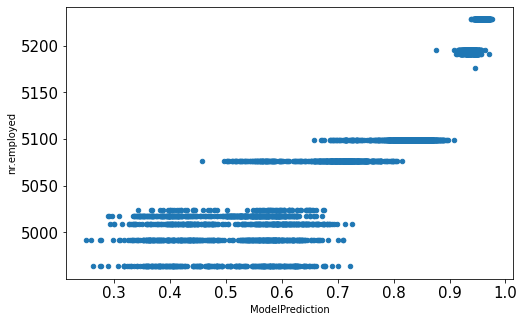

In [61]:
fig=dt.loc[dt.y==1].plot.scatter('ModelPrediction','nr.employed',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('nr.employed_vs_model.png',dpi=300)

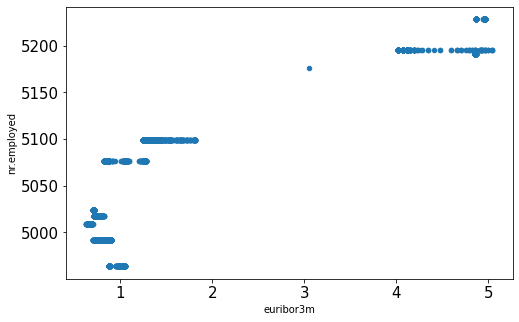

In [62]:
fig=dt.loc[dt.y==1].plot.scatter('euribor3m','nr.employed',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('nr.employed_vs_euribor3m.png',dpi=300)

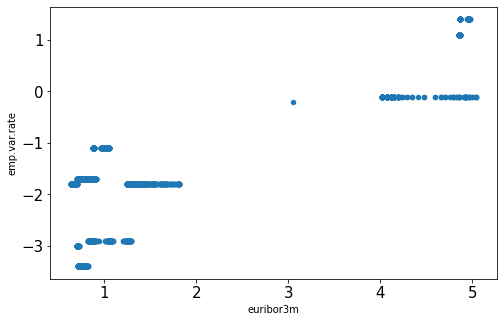

In [63]:
fig=dt.loc[dt.y==1].plot.scatter('euribor3m','emp.var.rate',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('emp.var.rate_vs_euribor3m.png',dpi=300)

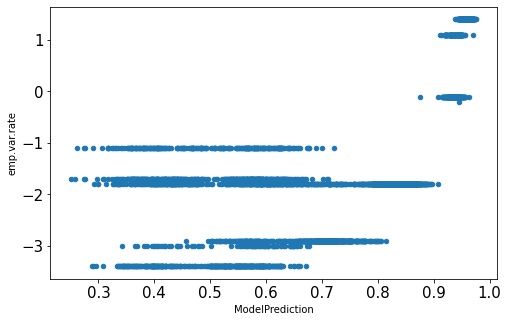

In [64]:
fig=dt.loc[dt.y==1].plot.scatter('ModelPrediction','emp.var.rate',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('emp.var.rate_vs_ModelPrediction.png',dpi=300)

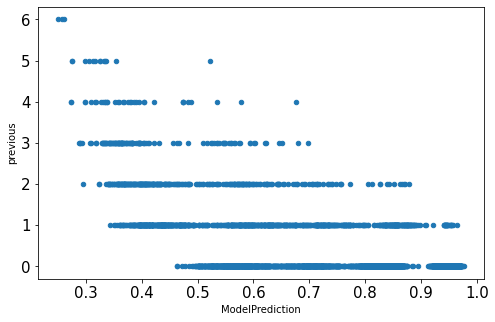

In [65]:
# Previous number of contacts
fig=dt.loc[dt.y==1].plot.scatter('ModelPrediction','previous',figsize=(8,5), fontsize=15).get_figure()
fig.savefig('previous_vs_ModelPrediction.png',dpi=300)

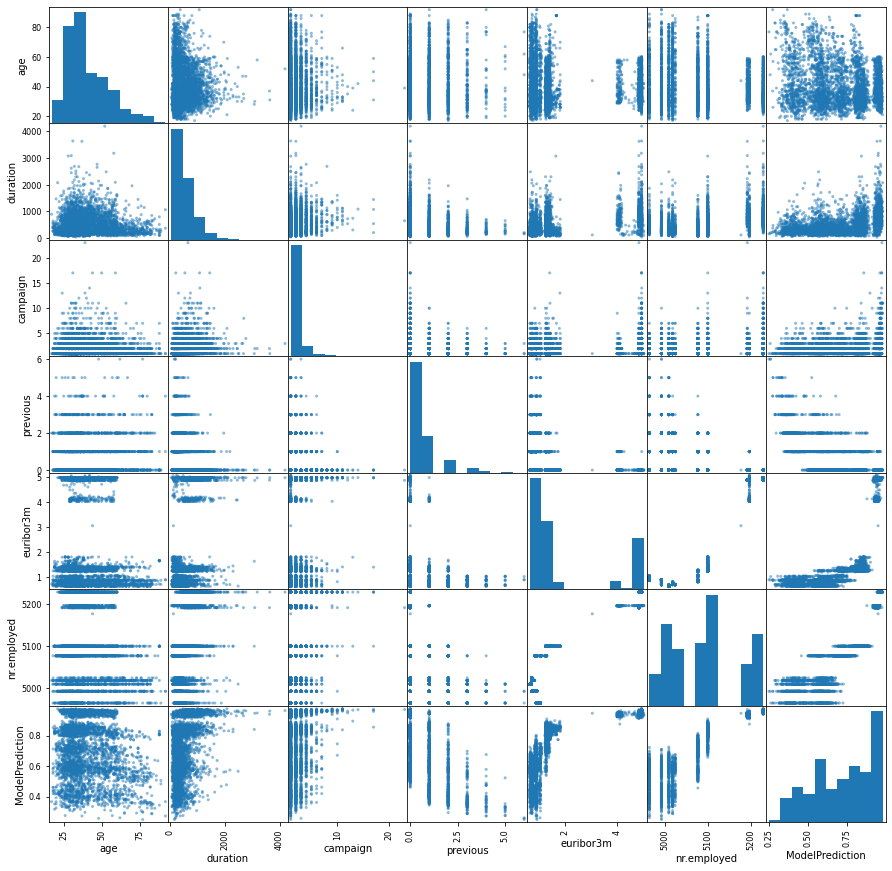

In [66]:

## Clients that subscribed:   y = 1
data = dt.loc[dt.y == 1, ['age', 'duration', 'campaign','previous','euribor3m','nr.employed','ModelPrediction']]

pandas.plotting.scatter_matrix(data, figsize=(15,15))
plt.savefig('Scatter_Matrix_y1.png',dpi=300)

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration', ylabel='age'>,
        <AxesSubplot:xlabel='campaign', ylabel='age'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='age'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='age'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='age'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='age'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='age'>,
        <AxesSubplot:xlabel='ModelPrediction', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='duration'>,
        <AxesSubplot:xlabel='duration', ylabel='duration'>,
        <AxesSubplot:xlabel='campaign', ylabel='duration'>,
        <AxesSubplot:xlabel='emp.var.rate', ylabel='duration'>,
        <AxesSubplot:xlabel='cons.price.idx', ylabel='duration'>,
        <AxesSubplot:xlabel='cons.conf.idx', ylabel='duration'>,
        <AxesSubplot:xlabel='euribor3m', ylabel='duration'>,
        <AxesSubplot:xlabel='nr.employed', ylabel='d

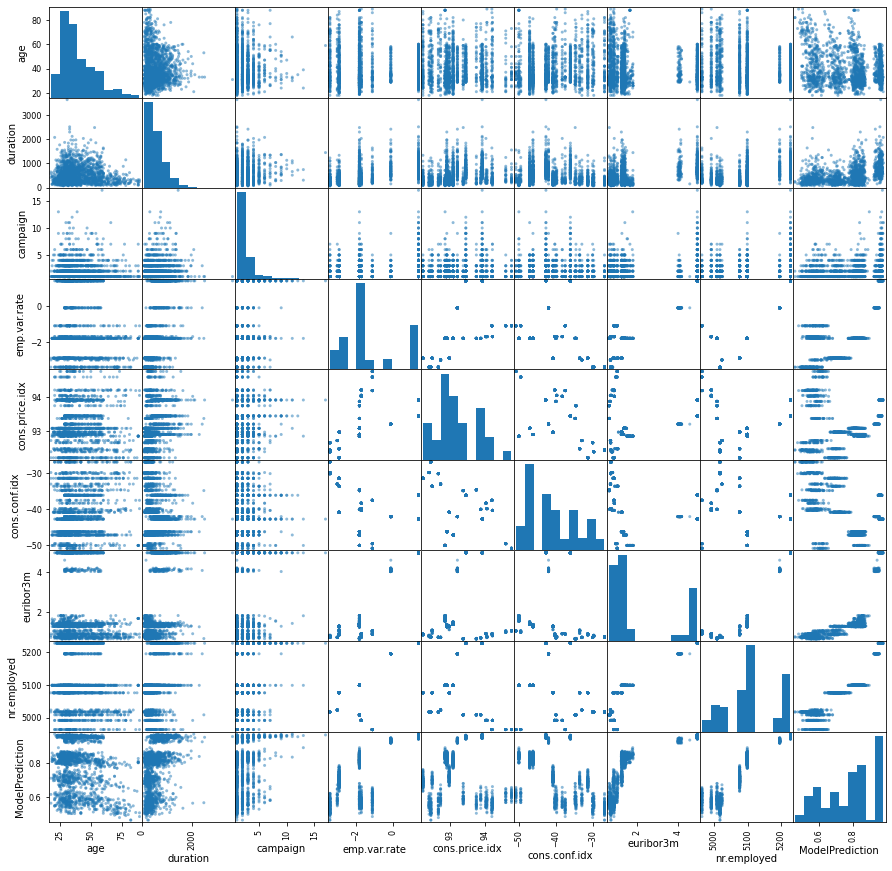

In [67]:
## Clients that subscribed:   y = 1
## Evaluating the Model predictions for most likely candidates
data= dt.loc[(dt.y == 1) & (dt.loan == 'no') &  (dt.default == 'no') & (dt.contact == 'cellular') & 
       (dt.poutcome == 'nonexistent'),
       ['age', 'job', 'marital', 'education','duration', 
        'campaign', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction']]

pandas.plotting.scatter_matrix(data, figsize=(15,15))


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1819 entries, 12384 to 41186
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1819 non-null   int64  
 1   job              1819 non-null   object 
 2   marital          1819 non-null   object 
 3   education        1819 non-null   object 
 4   duration         1819 non-null   int64  
 5   campaign         1819 non-null   int64  
 6   emp.var.rate     1819 non-null   float64
 7   cons.price.idx   1819 non-null   float64
 8   cons.conf.idx    1819 non-null   float64
 9   euribor3m        1819 non-null   float64
 10  nr.employed      1819 non-null   float64
 11  ModelPrediction  1819 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 184.7+ KB


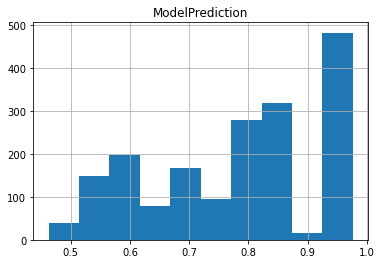

In [69]:
fig=data.hist('ModelPrediction')


## Evaluating the Model

###  Model Predictions  for previous campaign outcome  
(Although not sure if its fair to compare the previous campaing outcome  with the Model Predictions for the current campaign )

Assuming threshold of 0.9:
 - ModelPrediction >= 0.9 is a 'success'
 - ModelPrediction < 0.9 is a 'failure'

In [70]:
# True positives 
a = dt[ (dt.ModelPrediction >= 0.9) &  (dt.poutcome == 'success') ].index
true_pos = len(a)
true_pos

9

In [71]:
# False Negatives
a = dt[ (dt.ModelPrediction < 0.9) &  (dt.poutcome == 'success') ].index
false_neg = len(a)
false_neg

1256

In [72]:
# True Negatives
a = dt[ (dt.ModelPrediction < 0.9) &  (dt.poutcome == 'failure')  ].index
true_neg = len(a)
true_neg

2995

In [73]:
# False Positives

a = dt[(dt.ModelPrediction >= 0.9) & (dt.poutcome == 'failure')].index
false_pos = len(a)
false_pos

616

In [74]:
accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos +false_neg)
# Accuracy in percent
accuracy * 100 

61.6078753076292

## Model has ~62% accuracy for the previous campaign

In [75]:
# Check: if there is no cantact during this campaign, then no outcome 'y' is assigned
len(dt[ (dt.campaign == 0)].index)

0

array([[<AxesSubplot:title={'center':'y'}>]], dtype=object)

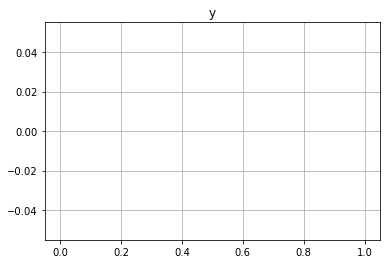

In [76]:
# Just like for the case of duration = 0 , check that no y = 0 is assigned  
dt[ (dt.campaign == 0)].hist('y')

###   Model Predictions  for current campaign:   

In [77]:
# True positives 
a = dt[(dt.y == 1) & (dt.ModelPrediction >= 0.9) ].index
true_pos = len(a)
true_pos

1005

In [78]:
# False Negatives
a = dt[(dt.y == 1) & (dt.ModelPrediction < 0.9)].index
false_neg = len(a)
false_neg

3057

In [79]:
# True Negatives
a = dt[(dt.y == 0) & (dt.ModelPrediction < 0.9) ].index
true_neg = len(a)
true_neg

8638

In [80]:
# False Positives

a = dt[(dt.y == 0) & (dt.ModelPrediction >= 0.9) ].index
false_pos = len(a)
false_pos

18886

## Model Accuracy

In [81]:
# Home many events that model predicted as positive outcome were really true positives.
sensitivity = true_pos /(true_pos + false_neg)
sensitivity *100

24.741506646971935

In [82]:
# Home many events that model predicted as negative outcome were really true negatives.
specificity = true_neg /(false_pos + true_neg)
specificity *100

31.38351983723296

In [83]:
# Accuracy in percent

accuracy = (true_pos + true_neg)/(true_pos + true_neg + false_pos +false_neg)
accuracy * 100 


30.529348445513836

##  CONCLUSIONS

### - Current model is mainly based on Euribor3m which is based on emp.var.rate, and nr.employed, and the number of previous contacts. 
### - This is not a good Model, since it has low accuracy 30.5% for the current campaign. It  does not generalize well for the new unseen ('nonexistent' previous outcomes) cases. 

### - Most likely client candidates have: No personal loans, no credit defaults, preference for 'cellular' contact, 'nonexistent' previous outcome. 

###  - The desired target 'y' strongly depends on education, job and marital status. Including these attributes in the new model will greatly improve the model's accuracy. 

### - Days of the week or the month of the last contact, housing are not importand features and are dropped. 

